
## Exploratory Data Analysis (EDA) of Viking Artifacts Dataset

This notebook presents an exploratory data analysis of a dataset containing information about Viking artifacts.


In [10]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json


In [7]:

# Load the dataset
file_path = '/Users/aly.milne/Library/CloudStorage/OneDrive-BrighamYoungUniversity/Fall 2023/STAT 386/ST386_Final_Project/Scraped_Data/Viking_war_artifacts.csv'
dataset = pd.read_csv(file_path)


In [11]:
dataset['Extra Details'] = dataset['Extra Details'].map(json.loads)

war_artifacts_exploded = pd.json_normalize(dataset.to_dict(orient='records'))

In [27]:
dataset = war_artifacts_exploded

In [17]:
war_artifacts_exploded['Extra Details.Datering'].unique()

array(['800 – 1100', '550 – 1100', '500 f.Kr. – 1100', '800 – 1250',
       '800 – 1500', nan], dtype=object)


### Basic Overview of the Dataset


In [19]:

basic_overview = {
    "Number of Rows": dataset.shape[0],
    "Number of Columns": dataset.shape[1],
    "Data Types": dataset.dtypes
}
basic_overview


{'Number of Rows': 448,
 'Number of Columns': 50,
 'Data Types': Unnamed: 0                             int64
 Föremålsbenämning                     object
 Föremålsnr.                           object
 Förvärvsnr.                          float64
 Andra nummer                          object
 Material                              object
 Plats                                 object
 Fornlämning                           object
 Socken                                object
 Landskap                              object
 Land                                  object
 Kontexttyp                            object
 Kontextnr.                            object
 Artbedömning                         float64
 Benslagsbedömning                    float64
 Museum                                object
 Unique Name                           object
 Catalog Link                          object
 Extra Details.Museum                  object
 Extra Details.Föremålsbenämning       object
 Extra Details.K


### Summary Statistics and Missing Values Analysis


In [22]:

# Summary Statistics for Numerical Data
numerical_summary = dataset.describe()

numerical_summary

,Unnamed: 0,Förvärvsnr.,Artbedömning,Benslagsbedömning
count,448.000000,442.000000,0.0,0.0
mean,223.500000,27113.447964,NaN,NaN
std,129.470717,10801.267888,NaN,NaN
min,0.000000,432.000000,NaN,NaN
25%,111.750000,18903.250000,NaN,NaN
50%,223.500000,34000.000000,NaN,NaN
75%,335.250000,34000.000000,NaN,NaN
max,447.000000,35000.000000,NaN,NaN


In [23]:

# Missing Values Analysis
missing_values = dataset.isnull().sum()

missing_values


Unnamed: 0                             0
Föremålsbenämning                      0
Föremålsnr.                            0
Förvärvsnr.                            6
Andra nummer                           0
Material                               1
Plats                                 20
Fornlämning                           87
Socken                                12
Landskap                               9
Land                                   0
Kontexttyp                           121
Kontextnr.                           128
Artbedömning                         448
Benslagsbedömning                    448
Museum                                 0
Unique Name                            0
Catalog Link                           0
Extra Details.Museum                   0
Extra Details.Föremålsbenämning        0
Extra Details.Kategori                 0
Extra Details.Material                 1
Extra Details.Storlek                303
Extra Details.Antal                   28
Extra Details.Da


### Categorical Data Analysis


In [28]:

# Exploring Distribution of Values in Key Categorical Columns
categorical_columns = ['Museum', 'Material']
category_distribution = {col: dataset[col].value_counts() for col in categorical_columns}
category_distribution


{'Museum': Historiska museet    448
 Name: Museum, dtype: int64,
 'Material': Järn                                                   324
 Järn, Trä                                               21
 Brons                                                   14
 Järn, Brons                                              9
 Ben/Horn                                                 7
 Järn, Silver                                             6
 Cu-legering                                              5
 Järn, Silver, Koppar                                     4
 Järn, Vitmetall                                          3
 Järn, Cu-legering                                        3
 Järn, Trä, Textil                                        3
 Järn, Textil                                             3
 Järn, Mässing                                            3
 Brons, Järn                                              3
 Silver                                                   3
 Järn, Koppar          


### Visualizations


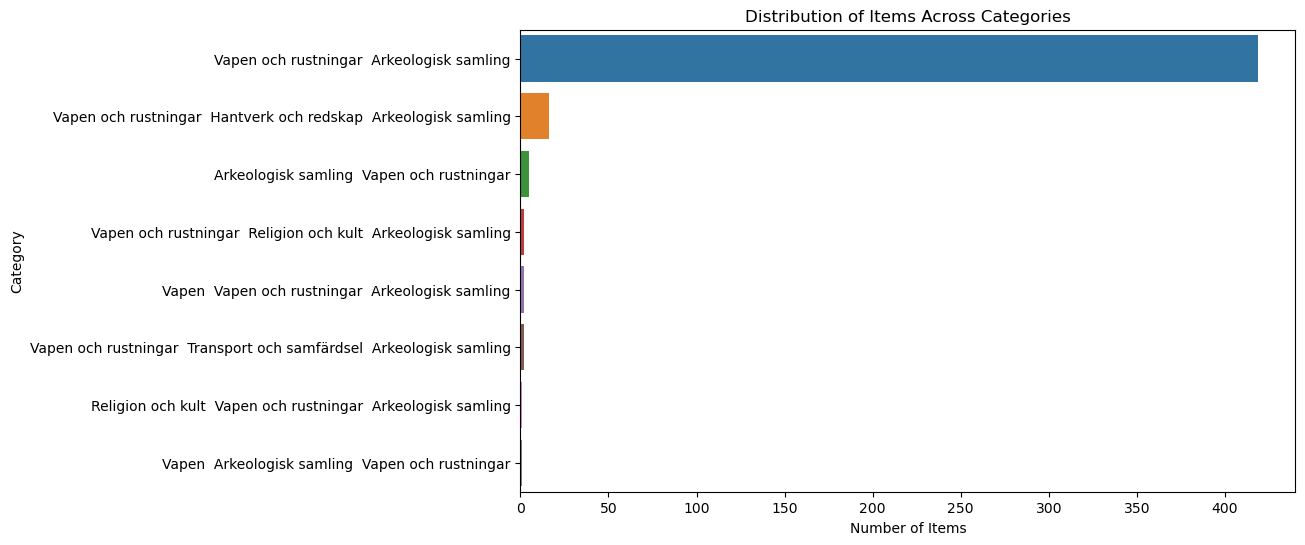

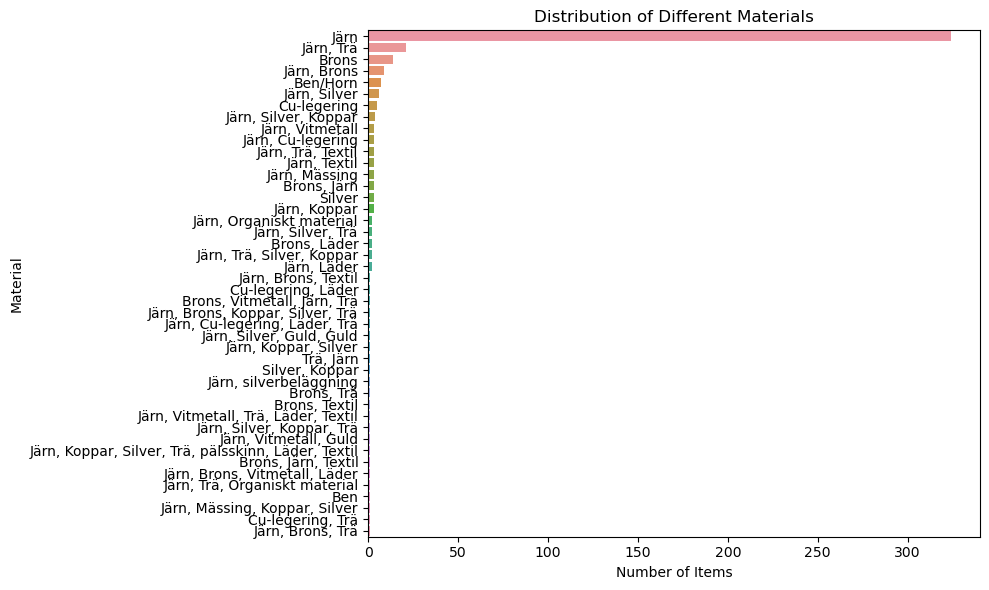

In [31]:

# Visualization 1: Bar Plot for Museum Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Extra Details.Kategori', data=dataset, order = dataset['Extra Details.Kategori'].value_counts().index)
plt.title('Distribution of Items Across Categories')
plt.xlabel('Number of Items')
plt.ylabel('Category')

# Visualization 2: Bar Plot for Material Distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Material', data=dataset, order = dataset['Material'].value_counts().index)
plt.title('Distribution of Different Materials')
plt.xlabel('Number of Items')
plt.ylabel('Material')

plt.tight_layout()
plt.show()
